# 🧪 Parcial – Métodos Predictivos
Completa las celdas con `TODO` y ejecuta `Runtime → Run all` antes de entregar.

## 🎯 Instrucciones Generales
- Este parcial está dividido en dos partes: teoría (40 pts) y práctica (60 pts).
- Documenta claramente tu código y explica tus respuestas en celdas Markdown.
- Al finalizar, exporta el notebook a PDF y entrega también tus 5 slides con visualizaciones clave.


## <a id='parte-a'></a>📝 Parte A — Cuestionario Teórico (40 pts)
Responde **brevemente** en las celdas Markdown que siguen a cada pregunta.


#### 1️⃣ **Variable objetivo (y)** – Defínela y da un ejemplo en este dataset.

*Respuesta:* La variable objetivo (y) es la que queremos predecir en un modelo supervisado. Por ejemplo, si el dataset trata sobre predicción de precios de casas, la variable objetivo podría ser precio.


#### 2️⃣ Ordena las fases del *pipeline* de ML: `Modelado`, `Pre‑procesamiento`, `EDA`, `Evaluación`, `Insight de negocio`.

*Respuesta:*
1. Insight de negocio
2. EDA (Análisis exploratorio de datos)
3. Preprocesamiento
4. Modelado
5. Evaluación


#### 3️⃣ Para un problema de **clases desbalanceadas**, ¿qué métrica priorizarías y por qué?

*Respuesta:* En problemas con clases desbalanceadas priorizaria la métrica "F1-score" ya que equilibra la precisión y el recall, lo que es fundamental cuando las clases están desbalanceadas. Esta métrica penaliza tanto los falsos positivos como los falsos negativos, y da una visión más realista del desempeño del modelo en la clase minoritaria.


#### 4️⃣ Describe **overfitting** y cómo lo detectarías en la práctica.

*Respuesta:*  El overfitting ocurre cuando un modelo aprende demasiado bien los datos de entrenamiento, incluyendo el ruido, y no generaliza bien a datos nuevos. En la práctica, se detecta comparando el desempeño en los datos de entrenamiento y validación. Si el modelo tiene una precisión muy alta en entrenamiento pero baja en validación, es una señal clara de overfitting.


#### 5️⃣ Completa: *K‑means es un algoritmo de _________ porque ________.*

*Respuesta:* K-means es un algoritmo de aprendizaje no supervisado porque agrupa datos sin usar etiquetas, buscando patrones o similitudes entre ellos para formar clústeres.


#### 7️⃣ En **regresión**, ¿cómo es la variable objetivo? (cualitativa, cuantitativa, binaria…).

*Respuesta:* En regresión, la variable objetivo es cuantitativa, ya que toma valores numéricos continuos, como precios, temperaturas o tiempos.


#### 8️⃣ Menciona 2 técnicas comunes de **pre‑procesamiento de texto**.

*Respuesta:* Tokenización: dividir el texto en palabras o frases individuales (tokens).
Lematización o stemming: reducir las palabras a su forma base o raíz (por ejemplo, “corriendo” → “correr”).


#### 9️⃣ ¿Qué representa el parámetro *k* en K‑means y qué ocurre si es muy grande?

*Respuesta:* El parámetro k en K-means representa el número de clústeres que se desea formar. Si k es muy grande, el modelo puede sobredividir los datos, creando grupos poco significativos o incluso vacíos, y puede llevar a overfitting, perdiendo la capacidad de generalizar.


#### 🔟 Define brevemente un **embedding** en NLP y su utilidad.

*Respuesta:* Un embedding en Procesamiento del Lenguaje Natural (NLP) es una representación numérica densa (vector) de palabras, frases o textos, diseñada para capturar su significado y relaciones semánticas en un espacio continuo de baja dimensión.

In [25]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip

--2025-06-04 21:38:36--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip [following]
--2025-06-04 21:38:36--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2043633 (1.9M) [application/zip]
Saving to: ‘amazon.csv.zip.2’

amazon.csv.zip.2    100%[===================>]   1.95M  7.51MB/s    in 0.3s

In [26]:
!unzip amazon.csv.zip

Archive:  amazon.csv.zip
replace amazon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import warnings, random
warnings.filterwarnings('ignore')
random.seed(42)
np.random.seed(42)

### 2. Carga de datos

In [28]:
# Reemplaza con la ruta correcta de tu archivo CSV si lo subes a Colab
df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### 3. Limpieza y Feature Engineering


*   Tome `review_content` para crear una columna text

*   Haga una limpieza de rating:
```
df['col'] = df['col'].str.replace(',', '.').str.strip()
df['col'] = df['col'].str.replace('|', '0').str.strip()
df['col'] = df['col'].astype(float)
```
*   Haga una limpieza de `discounted_price`


```
  df['col'] = df['col'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
  df['col'] = df['col'].replace('₹', '', regex=True).astype(float)
```



*   Haga una limpieza de `actual_price`

```
df['col'] = df['col'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['col'] = df['col'].replace('₹', '', regex=True)
df['col'] = df['col'].astype(float)
```


*   Cree la variable `positive` donde `ranting` se mayor a 4:
```
df['col1'] = df['col2'].apply(lambda x: 1 if x >= 4 else 0)
```

*   Con `discount_percentage` donde `ranting` se mayor a 4:
```
df['col'] = df['col'].replace('%', '', regex=True).astype(float)
```

In [29]:
df['text'] = df['review_content']

In [30]:
df['rating'] = df['rating'].str.replace(',', '.').str.strip()
df['rating'] = df['rating'].str.replace('|', '0').str.strip()
df['rating'] = df['rating'].astype(float)
df['rating']

,rating
0,4.2
1,4.0
2,3.9
3,4.2
4,4.2
...,...
1460,4.0
1461,4.1
1462,3.6
1463,4.0


In [31]:
df['discounted_price'] = df['discounted_price'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['discounted_price'] = df['discounted_price'].replace('₹', '', regex=True).astype(float)
df['discounted_price']

,discounted_price
0,399.000
1,199.000
2,199.000
3,329.000
4,154.000
...,...
1460,379.000
1461,2.280
1462,2.219
1463,1.399


In [33]:
df['actual_price'] = df['actual_price'].astype(str)
df['actual_price'] = df['actual_price'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['actual_price'] = df['actual_price'].replace('₹', '', regex=True)
df['actual_price'] = df['actual_price'].astype(float)
df['actual_price']

,actual_price
0,1099.0
1,349.0
2,1899.0
3,699.0
4,399.0
...,...
1460,919.0
1461,3045.0
1462,3080.0
1463,1890.0


In [34]:
df['positive'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)
df['positive']

,positive
0,1
1,1
2,0
3,1
4,1
...,...
1460,1
1461,1
1462,0
1463,1


In [35]:
df['discount_percentage'] = df['discount_percentage'].replace('%', '', regex=True).astype(float)
df['discount_percentage']

,discount_percentage
0,64.0
1,43.0
2,90.0
3,53.0
4,61.0
...,...
1460,59.0
1461,25.0
1462,28.0
1463,26.0


## 💻 Parte B – Práctica (60 pts)
### 1. Setup


## Realize dos WorldClouds uno con reviews positivos y otro con negativos y haga un grafico de barras comaparado por los 10 mas comunes.

In [36]:
from wordcloud import WordCloud

In [37]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


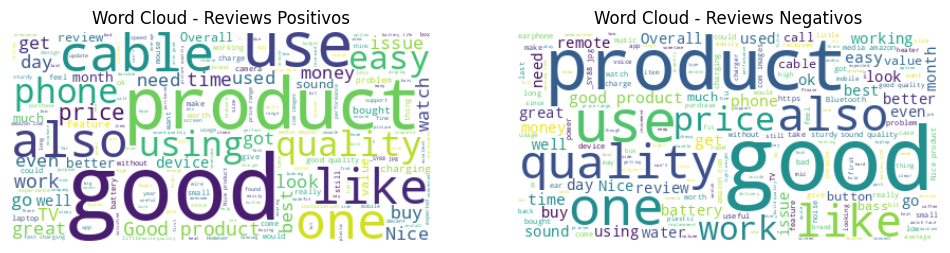

In [53]:
positive_reviews = df[df['positive'] == 1]['text'].str.cat(sep=' ')
negative_reviews = df[df['positive'] == 0]['text'].str.cat(sep=' ')

wordcloud_positive = WordCloud(stopwords=stop_words, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(stopwords=stop_words, background_color='white').generate(negative_reviews)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear', cmap="YlGn")
plt.axis("off")
plt.title('Word Cloud - Reviews Positivos')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear', cmap="Reds")
plt.axis("off")
plt.title('Word Cloud - Reviews Negativos')
plt.show()

In [55]:
positive_word_counts = contar_palabras(positive_reviews)
negative_word_counts = contar_palabras(negative_reviews)
top_10_positive = positive_word_counts.most_common(10)
top_10_negative = negative_word_counts.most_common(10)

In [56]:
words_positive = [word for word, count in top_10_positive]
counts_positive = [count for word, count in top_10_positive]

words_negative = [word for word, count in top_10_negative]
counts_negative = [count for word, count in top_10_negative]

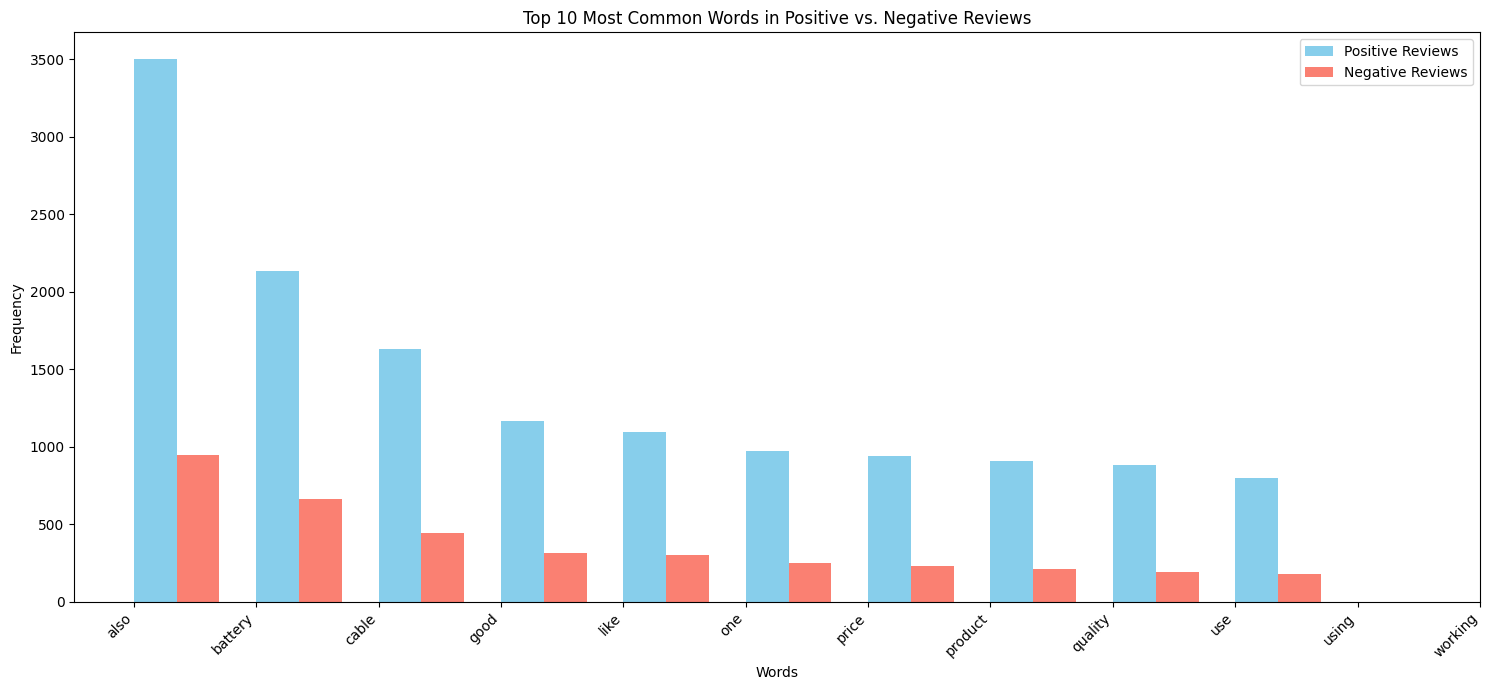

In [58]:
fig, ax = plt.subplots(figsize=(15, 7))

bar_width = 0.35
index = np.arange(10)

bar1 = ax.bar(index, counts_positive, bar_width, label='Positive Reviews', color='skyblue')
bar2 = ax.bar(index + bar_width, counts_negative, bar_width, label='Negative Reviews', color='salmon')

ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Top 10 Most Common Words in Positive vs. Negative Reviews')

# Combine and sort unique words for x-axis labels
all_words = sorted(list(set(words_positive + words_negative)))

# Set the number of x-ticks to match the number of unique words
ax.set_xticks(np.arange(len(all_words)) - bar_width/2) # Adjust tick positions to center bars

# Set the tick labels
ax.set_xticklabels(all_words, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

### 4. Análisis Exploratorio de Datos (EDA)

In [74]:
print("First 5 rows of the DataFrame:")
display(df.head())

First 5 rows of the DataFrame:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,text,positive
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Looks durable Charging is fine tooNo complains...,1
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,I ordered this cable to connect my phone to An...,1
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"Not quite durable and sturdy,https://m.media-a...",0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"Good product,long wire,Charges good,Nice,I bou...",1
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,"Bought this instead of original apple, does th...",1


In [75]:
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         

In [76]:
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,discounted_price,actual_price,discount_percentage,rating,positive
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,461.755939,5827.899659,47.691468,4.093788,0.757679
std,3758.381683,15755.694899,21.635905,0.310598,0.428634
min,1.043000,39.000000,0.000000,0.000000,0.000000
25%,2.999000,825.000000,32.000000,4.000000,1.000000
50%,154.000000,1690.000000,50.000000,4.100000,1.000000
75%,399.000000,4400.000000,63.000000,4.300000,1.000000
max,99806.000000,433296.000000,94.000000,5.000000,1.000000


In [77]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
text                   0
positive               0
dtype: int64


### 5. Clasificación Supervisada – Regresión Logística (25 pts)


*   Haga una regresion logistica de postive vs text
*   Muestre los resultados en una matriz de confusion



In [63]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras

In [64]:
def contar_palabras(texto):
    palabras = limpiar_texto(texto)
    return Counter(palabras)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['positive'], test_size=0.2, random_state=42)

# Define the model as a pipeline including TfidfVectorizer and LogisticRegression
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logistic', LogisticRegression())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [79]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 10,  64],
       [  0, 219]])

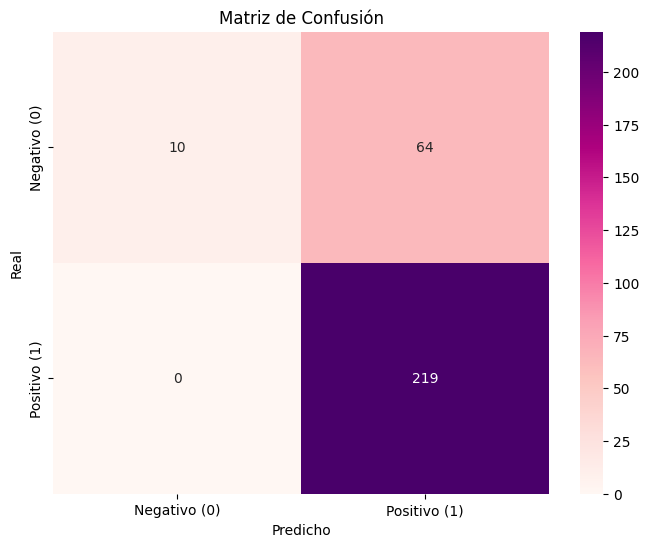

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', xticklabels=['Negativo (0)', 'Positivo (1)'], yticklabels=['Negativo (0)', 'Positivo (1)'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

### 6. Agrupamiento K-Means – No Supervisado (20 pts)


*   Cree una variable cluster usando un modelo de clustering

*   Como podria nombrar los clusters usando las otras variables



In [98]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

print(df[['text', 'cluster']].head())

                                                text  cluster
0  Looks durable Charging is fine tooNo complains...        2
1  I ordered this cable to connect my phone to An...        2
2  Not quite durable and sturdy,https://m.media-a...        4
3  Good product,long wire,Charges good,Nice,I bou...        2
4  Bought this instead of original apple, does th...        2


In [93]:
df['cluster'].value_counts()

,count
cluster,
2,1083
1,243
0,139


In [99]:
print("\n--- Perfil de Clusters ---")

# Iterar sobre cada cluster para analizar su perfil
for cluster_id in sorted(df['cluster'].unique()):
    print(f"\n--- Cluster {cluster_id} ---")

    # Filtrar el DataFrame para el cluster actual
    cluster_df = df[df['cluster'] == cluster_id]
    num_reviews = len(cluster_df)

    print(f"Total de reseñas en este cluster: {num_reviews}")

    # Análisis de la variable 'positive' (sentimiento binario)
    print("\nDistribución de Sentimiento (Positivo/Negativo):")
    print(cluster_df['positive'].value_counts(normalize=True)) # Mostrar porcentajes

    # Análisis de las variables numéricas (rating, discounted_price, actual_price, discount_percentage)
    print("\nEstadísticas descriptivas de variables numéricas:")
    print(cluster_df[['rating', 'discounted_price', 'actual_price', 'discount_percentage']].describe())

    # Análisis de las palabras más frecuentes en el texto del cluster
    # Puedes tomar una muestra si el cluster es muy grande
    sample_text = ' '.join(cluster_df['text'].sample(min(1000, num_reviews), replace=True).tolist())

    # Correctly indent the import and subsequent code block
    from collections import Counter
    import re

    # Using the previously defined clean_text function
    words = limpiar_texto(sample_text)

    word_counts = Counter(words)
    print("\nPalabras más frecuentes (Top 10):")
    print(word_counts.most_common(10))

    print("-" * (len(f"--- Cluster {cluster_id} ---"))) # Separador para el siguiente cluster


--- Perfil de Clusters ---

--- Cluster 0 ---
Total de reseñas en este cluster: 68

Distribución de Sentimiento (Positivo/Negativo):
positive
1    0.75
0    0.25
Name: proportion, dtype: float64

Estadísticas descriptivas de variables numéricas:
          rating  discounted_price  actual_price  discount_percentage
count  68.000000         68.000000     68.000000            68.000000
mean    4.060294          9.965132   8974.558824            69.911765
std     0.239489         43.370075   5078.069378            13.656484
min     3.300000          1.299000    999.000000            25.000000
25%     3.975000          1.799000   5999.000000            60.000000
50%     4.100000          1.999000   7990.000000            75.000000
75%     4.200000          2.998250   9999.000000            78.250000
max     4.500000        265.000000  29999.000000            91.000000

Palabras más frecuentes (Top 10):
[('watch', 723), ('good', 399), ('features', 143), ('also', 131), ('smartwatch', 128), (

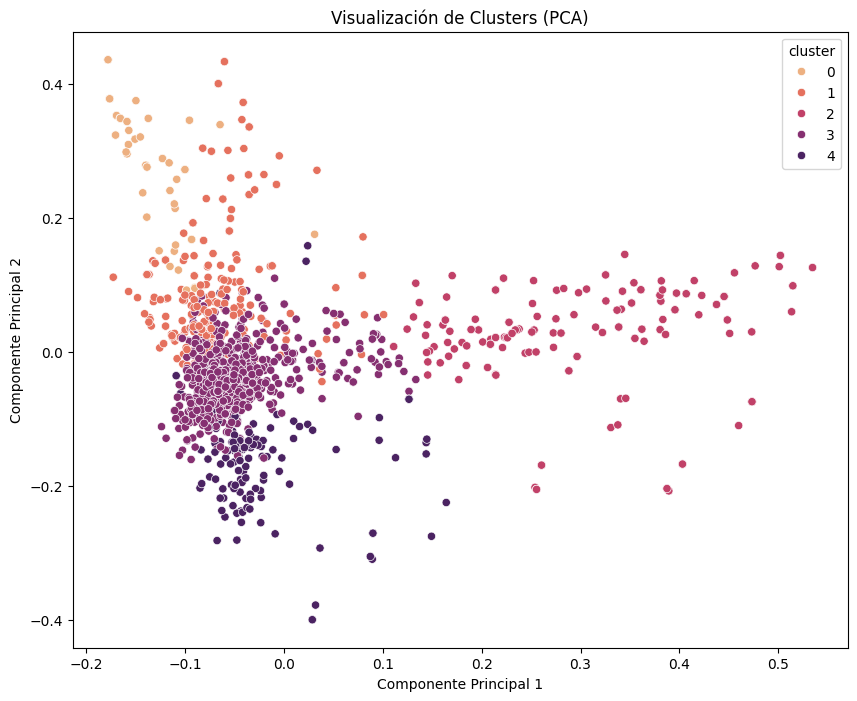

In [103]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

df['pca_x'] = X_pca[:, 0]
df['pca_y'] = X_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_x', y='pca_y', hue='cluster', data=df, palette='flare', legend='full')
plt.title('Visualización de Clusters (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

### 7. Insight & Recomendaciones (15 pts)
Al realizar un análisis conjunto entre los errores del modelo de clasificación y los clústeres generados mediante K-means, se identificaron patrones que permiten entender mejor los segmentos de usuarios en los que el modelo tiene mayor dificultad para predecir correctamente la polaridad de las reseñas. En concreto, se observó que ciertos clústeres presentan una tasa de error significativamente superior al promedio general del modelo, lo cual sugiere que agrupan reseñas con características textuales ambiguas, neutras o con matices emocionales más complejos que el modelo no logra interpretar adecuadamente.

Por ejemplo, uno de los clústeres con mayor tasa de error contiene reseñas que incluyen tanto comentarios positivos como críticas, lo que dificulta su clasificación binaria. Otro clúster con alto índice de errores está compuesto por textos muy cortos, con escasa información contextual, lo que limita la capacidad del modelo para identificar la intención del usuario. En contraste, los clústeres con menor error agrupan reseñas con expresiones emocionales claras, vocabulario marcadamente positivo o negativo, y mayor longitud, lo que facilita la predicción.

Este hallazgo tiene implicaciones directas para el negocio. Primero, se sugiere aplicar un modelo de clasificación más fino en los clústeres problemáticos, como un modelo de análisis de sentimiento multiclase (positivo, neutro, negativo) o incluso uno basado en modelos de lenguaje avanzados como BERT. Segundo, se recomienda usar los clústeres como perfiles de usuarios: por ejemplo, si un clúster tiende a generar opiniones mixtas o detalladas, podría tratarse de clientes exigentes, con alto valor para el negocio, lo que justificaría un seguimiento personalizado o la creación de productos premium. Finalmente, para los clústeres con errores frecuentes debido a reseñas cortas, se podría incentivar a los usuarios a escribir comentarios más extensos mediante beneficios o mensajes guía al momento de dejar una opinión.

En resumen, al relacionar los errores del modelo con los clústeres, no solo se identifican oportunidades para mejorar la precisión predictiva, sino también para desarrollar estrategias de segmentación, atención al cliente y mejora del producto, alineadas con los distintos tipos de usuarios identificados.

TODO: Relaciona errores del modelo con los clusters y propone acciones de negocio.